In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [65]:
data = pd.read_csv('/Users/ticianacoelhodasilva/Desktop/train_house_prices.csv')

In [66]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [67]:
data.describe() #shift-tab

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


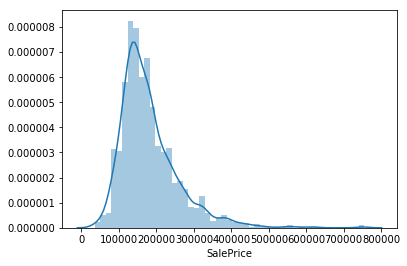

In [73]:
#histogram
#plt.hist(data['SalePrice'], facecolor='g')
sns.distplot(data['SalePrice']);

In [51]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [52]:
print("Desvio: %f" % data['SalePrice'].skew())
print("Curtose: %f" % data['SalePrice'].kurt())
#curtose=0: mesmo achatamento da distribuição normal. Curtose>3: mais concentrada que a normal.

Desvio: 1.882876
Curtose: 6.536282


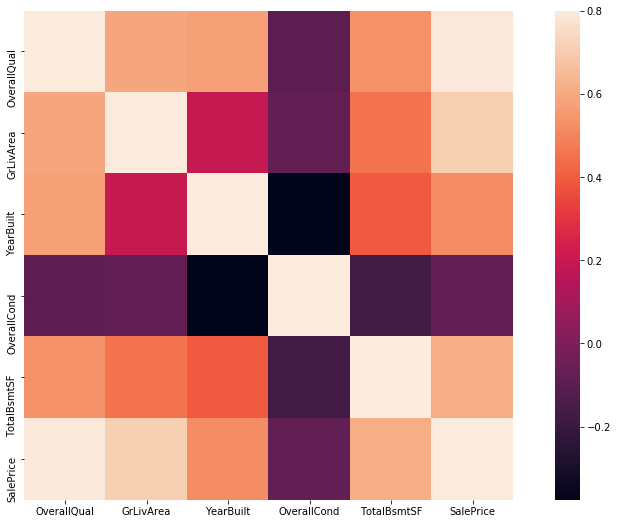

In [76]:
#correlation matrix
new = data[['OverallQual', 'GrLivArea', 'YearBuilt', 
            'OverallCond', 'TotalBsmtSF', 'SalePrice']].copy()

corrmat = new.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [77]:
#Pela matrix, OverallCond não tem associação com SalePrice
#Já OverallQual, GrLivArea, TotalBsmSF aparentemente tem alta associação. 

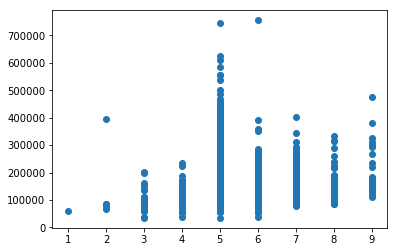

In [57]:
plt.scatter(data.OverallCond, data.SalePrice)

In [93]:
#O coeficiente de correlação mostra quão bem um modelo linear descreve a relação entre duas variáveis.
#Quando r=0, indica que as variáveis não são correlacionadas
print("Coeficiente de correlação r entre SalePrice e OverallCond: %f" % data.SalePrice.corr(data.OverallCond))

Coeficiente de correlação r entre SalePrice e OverallCond: -0.077856


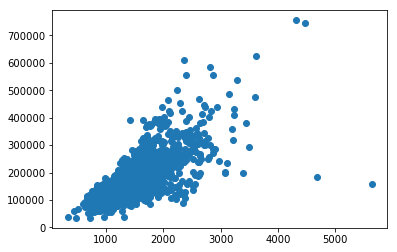

In [89]:
plt.scatter(data.GrLivArea, data.SalePrice)
#comportamento quase linear

In [94]:
print("Coeficiente de correlação r entre SalePrice e GrLivArea: %f" % data.SalePrice.corr(data.GrLivArea))

Coeficiente de correlação r entre SalePrice e GrLivArea: 0.708624


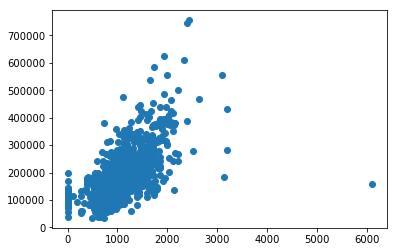

In [54]:
plt.scatter(data.TotalBsmtSF,data.SalePrice)
#comportamento não tão correlacionado

In [95]:
print("Coeficiente de correlação r entre SalePrice e TotalBsmtSF: %f" % data.SalePrice.corr(data.TotalBsmtSF))

Coeficiente de correlação r entre SalePrice e TotalBsmtSF: 0.613581


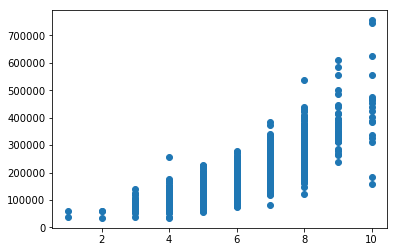

In [55]:
plt.scatter(data.OverallQual,data.SalePrice)

In [90]:
print("Coeficiente de correlação r: %f" % data.SalePrice.corr(data.OverallQual))

Coeficiente de correlação r: 0.790982


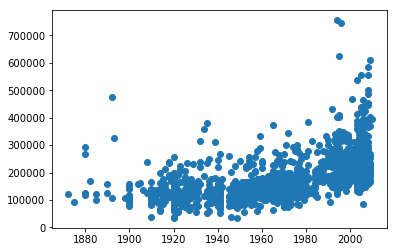

In [62]:
plt.scatter(data.YearBuilt,data.SalePrice)

In [87]:
#YearBuilt aparentemente é também linearmente associado a SalePrice, porém não tão bem como os outros 
#atributos analisados.  
print("Coeficiente de correlação r: %f" % data.SalePrice.corr(data.YearBuilt))
#Quanto mais próximo r está de +1 ou -1, indica que a associação entre as duas variáveis é linear.

Coeficiente de correlação r: 0.522897


In [88]:
#Estudo da quantidade de atributos que tem valores nulo
#Geralmente, se um atributo tem mais de 50% dos seus valores nulo, é um bom candidato a ser descartado para diminuir a dimensionalidade
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
